#    import librairies 
exclusivité d'appartenance:

K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance).

Les clusters retenus minimisent la distance entre leurs centres(centroids):

K-Means avec différentes valeurs de K et de calculer la variance des différents clusters.  La variance est la somme des distances entre chaque centroid d’un cluster et les différentes observations inclues dans le même cluster. Ainsi, on cherche à trouver un nombre de clusters K de telle sorte que les clusters retenus minimisent la distance entre leurs centres (centroids) et les observations dans le même cluster. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [ ]:
# Exploration Data

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Visualisation des données

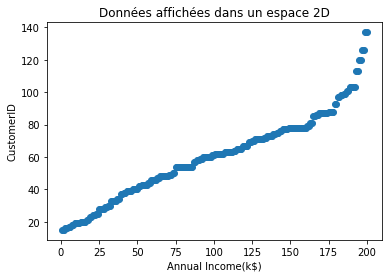

In [7]:
import matplotlib.pyplot as plt 

# Visualisation des données 
plt.scatter(df['CustomerID'],df['Annual Income (k$)'])
plt.ylabel('CustomerID')
plt.xlabel('Annual Income(k$)')
plt.title('Données affichées dans un espace 2D')
plt.show()

# Data visualization

In [ ]:
plt.style.use('fivethirtyeight')

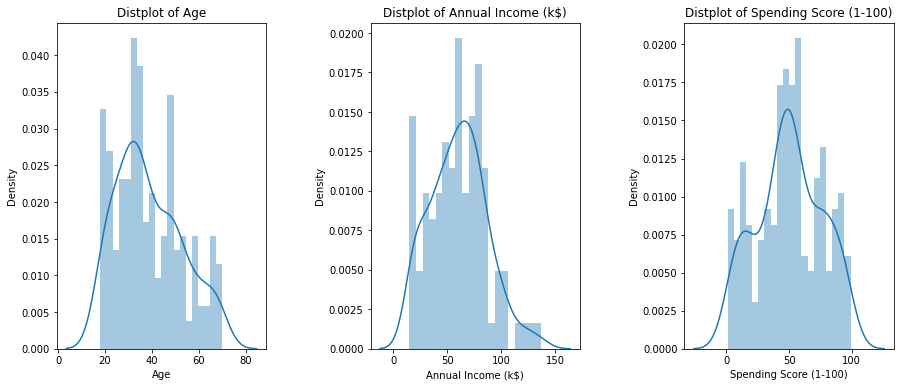

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

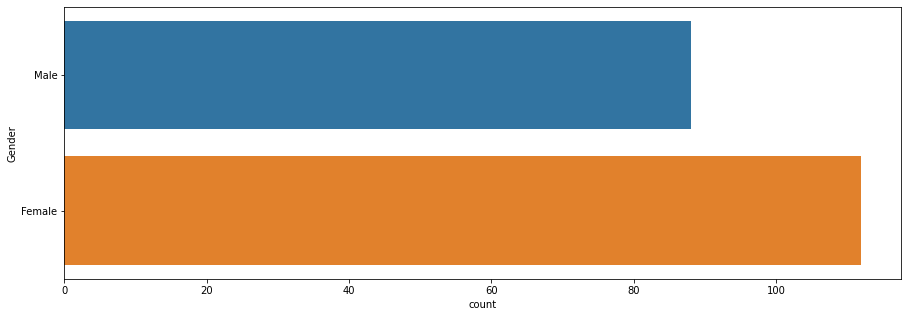

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

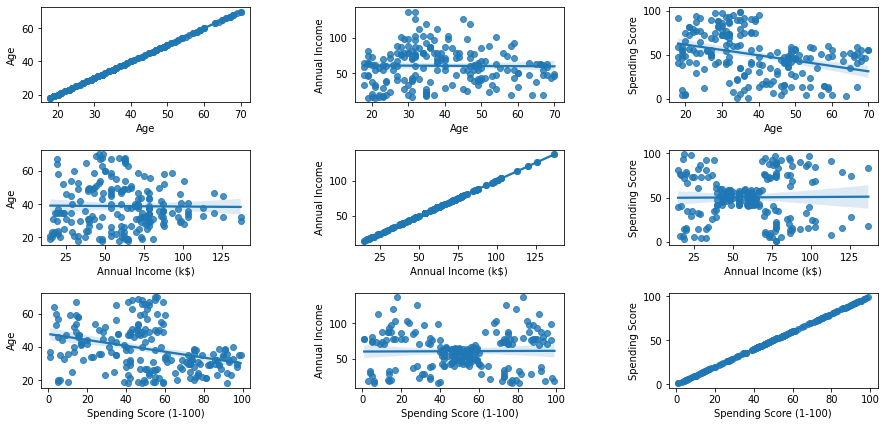

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [15]:
df1 = pd.get_dummies(df, columns = ['Gender'])
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [16]:
df1.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female             uint8
Gender_Male               uint8
dtype: object

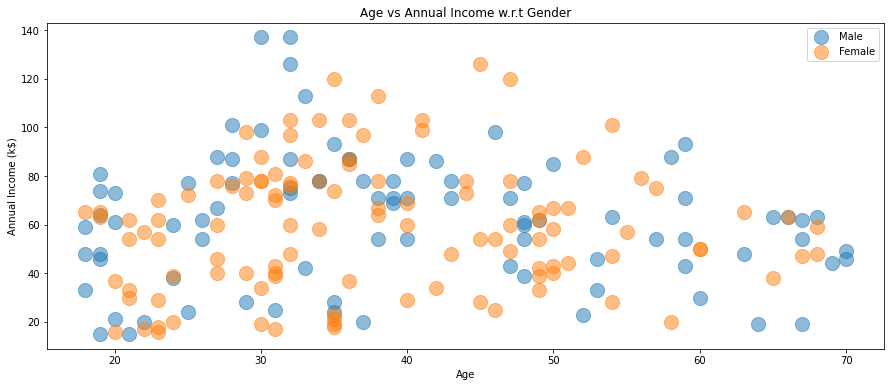

In [28]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

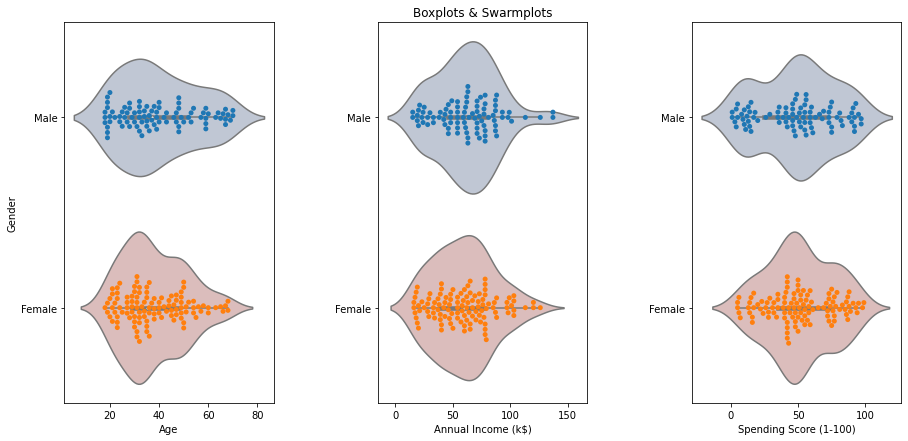

In [29]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

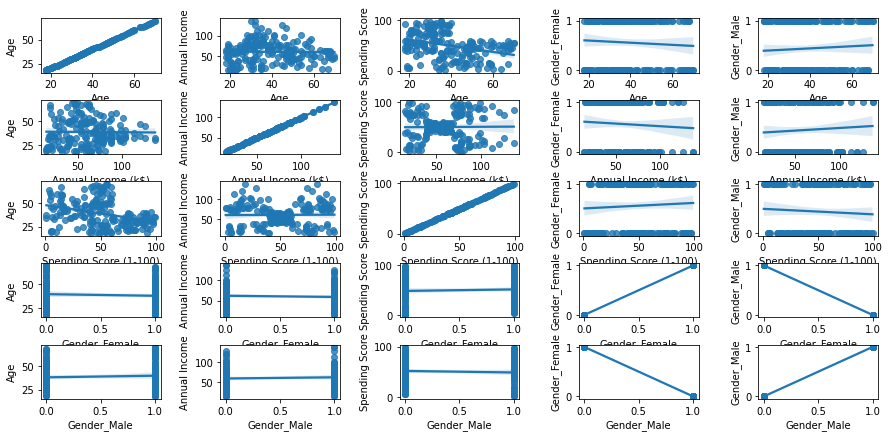

In [19]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']:
        n += 1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df1)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

# detection des outliers

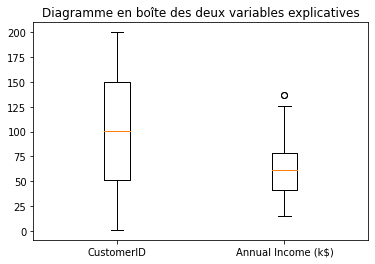

In [8]:
# Diagramme en boîte (boxplot) de toutes les variables explicatives
liste = [df['CustomerID'], df['Annual Income (k$)']]
plt.figure()
plt.title('Diagramme en boîte des deux variables explicatives')
plt.boxplot(liste, labels = ['CustomerID', 'Annual Income (k$)'])
plt.show()

In [3]:
df = pd.read_csv('Mall_Customers.csv')
# creating a dict file 
Gender = {'Male': 1,'Female': 0}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
df.Gender = [Gender[item] for item in df.Gender]
print(df)
df.head()

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
print(list(df.keys()))

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


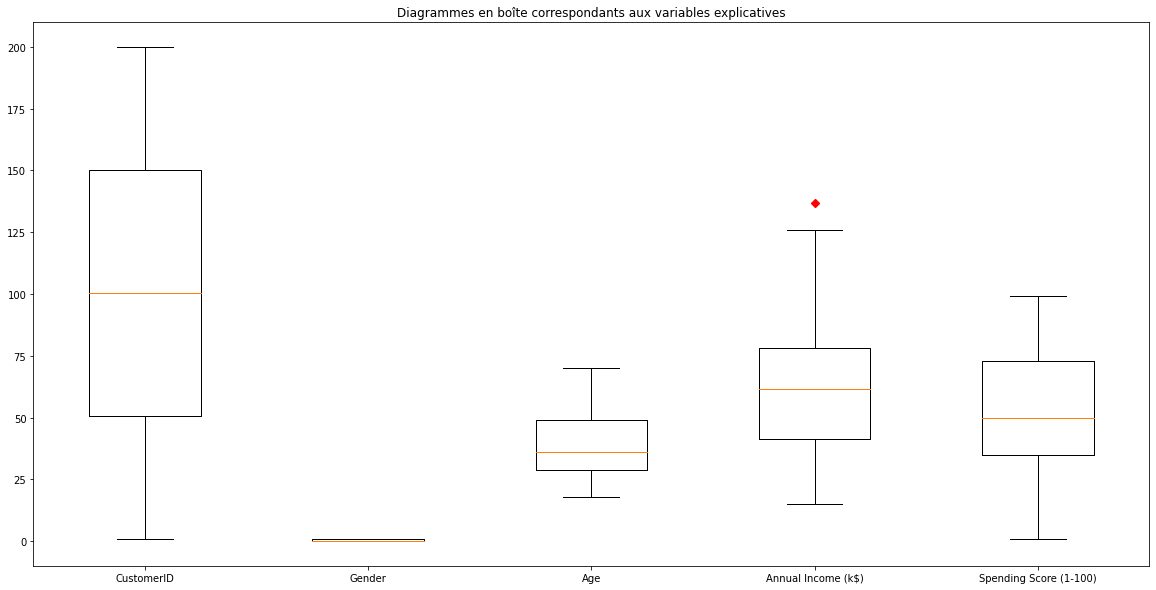

In [4]:
#Récupération des indices des colonnes 
ls_features = list(df.keys())

# Diagramme en boîte (boxplot) de toutes les variables explicatives
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(df.values, 0, 'rD', labels = ls_features)
# ou df.boxplot(column=list(df.columns))

plt.show()

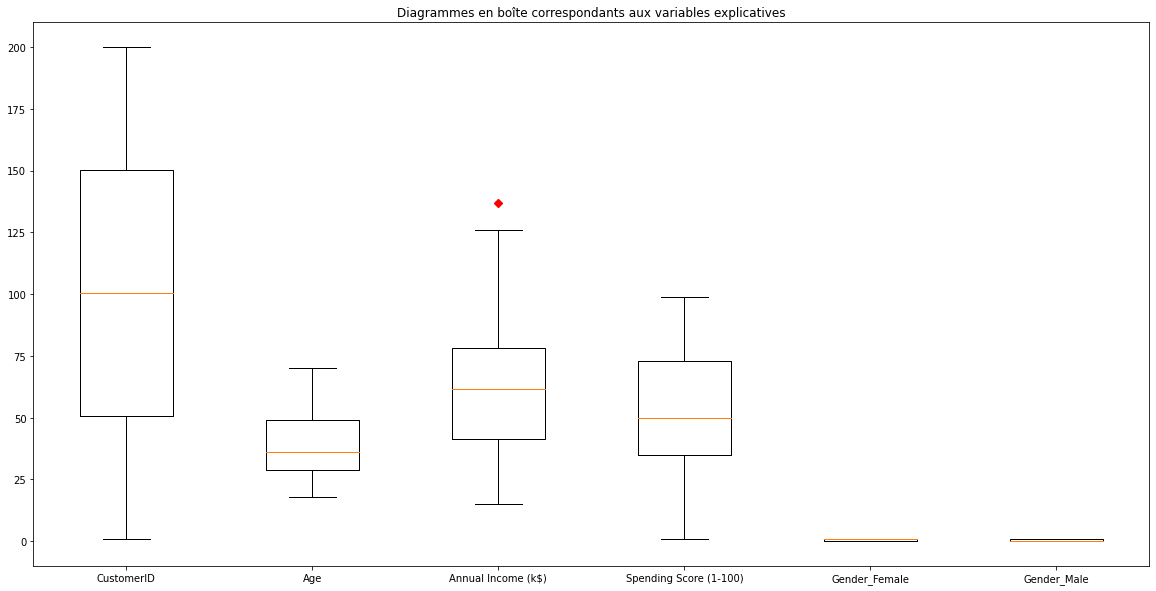

In [31]:
 #Récupération des indices des colonnes 
ls_features = list(df1.keys())

# Diagramme en boîte (boxplot) de toutes les variables explicatives
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(df1.values, 0, 'rD', labels = ls_features)
# ou df.boxplot(column=list(df.columns))

plt.show()

# Apprentissage des données

In [21]:
# Algorithme de K-means
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df1)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


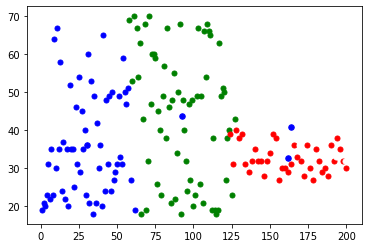

In [23]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["g.","r.","b.","w."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df1)):
    plt.plot(df1.iloc[i,0], df1.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

# Elbow method

In [24]:
# Importation de la fonction cdist du package scipy.spatial.distance
from scipy.spatial.distance import cdist

# Liste des nombre de clusters
range_n_clusters = [2, 3, 4, 5, 6]  

# Initialisation de la liste de distorsions
distorsions = []

# Calcul des distorsions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(df1)
    
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(df1, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df1, axis = 0))

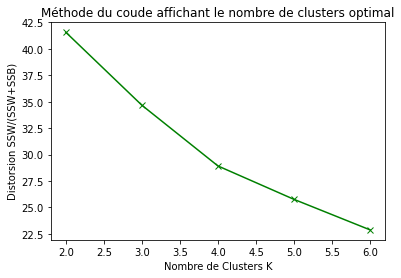

In [25]:
# Visualisation des distorsions en fonction du nombre de clusters
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()


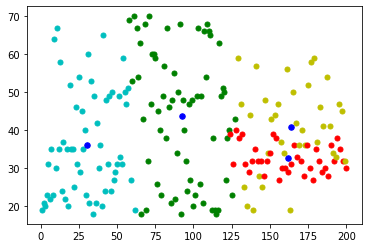

In [27]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["g.","r.","c.","y."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df1)):
    plt.plot(df1.iloc[i,0], df1.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

# Classification ascendante hierarchique

In [60]:
 #Insérez votre code ici
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Initialisation du classificateur CAH pour 4 clusters
cluster = AgglomerativeClustering(n_clusters = 4)

# Apprentissage des données 
cluster.fit(df[ls_features])

# Calcul des labels du data set
labels = cluster.labels_

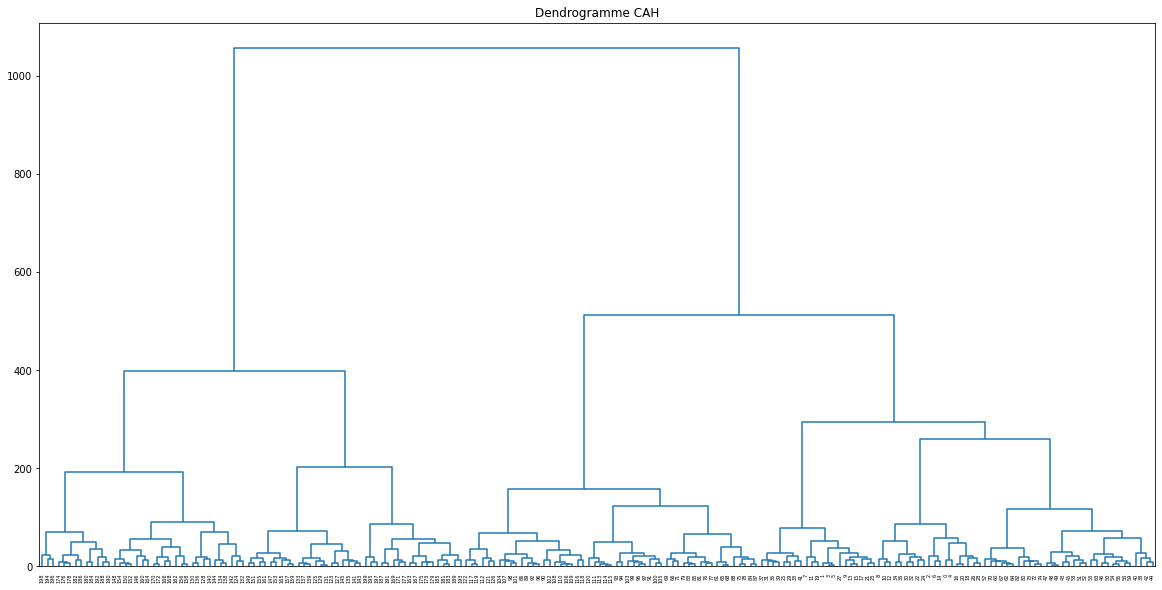

In [62]:
# Importation des packages nécessaires pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialisaion de la figrue
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(df, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

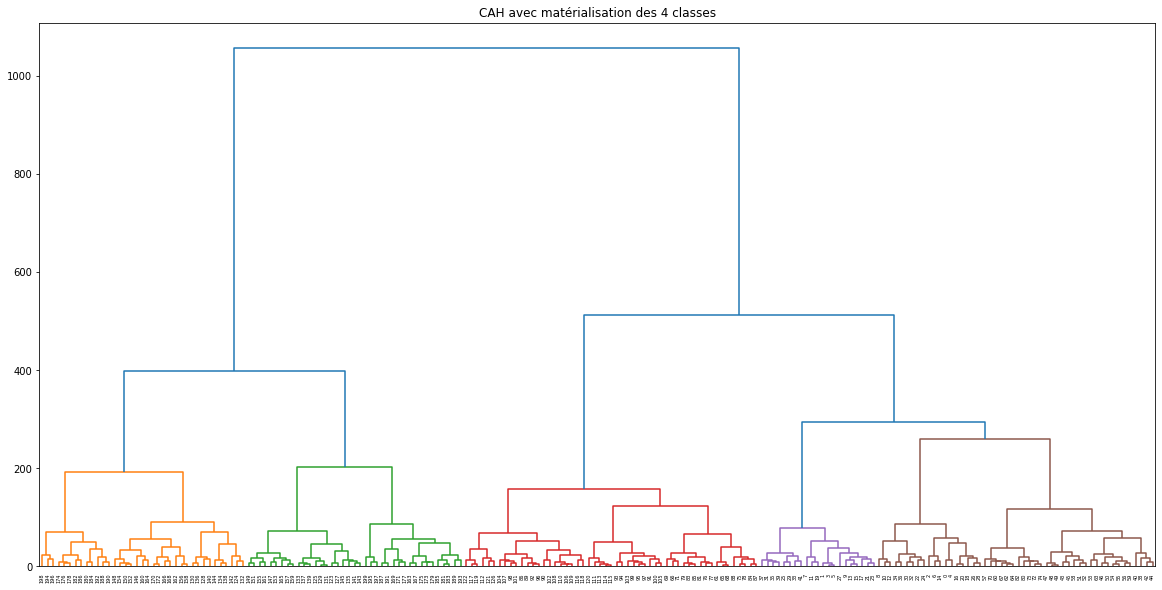

In [63]:
# Initialisation de la figure
plt.figure(figsize=(20, 10))

# Matérialisation des 4 classes (hauteur t = 290)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, labels = df1.index, leaf_rotation = 90., color_threshold = 290)
plt.show()

In [66]:
from sklearn.metrics import silhouette_score
#Définition de la liste de n_clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Initialisation de la liste des coefficients de la silhouette score
s_scores = []

# Calcul du coefficient de silhouette pour les différentes valeurs de n_clusters
for n_clusters in range_n_clusters :
    
    # Initialisation du classificateur CAH pour n_clusters
    cluster = AgglomerativeClustering(n_clusters = n_clusters)

    # Apprentissage des données 
    cluster.fit(df[ls_features])

    # Calcul des labels du data set
    labels = cluster.labels_
    
    # Caclul du coefficient de silhouette
    s_score = silhouette_score(df, labels, metric='sqeuclidean')
    s_scores.append(s_score)

In [68]:
s_scores

[0.646942145121121,
 0.4640051088296755,
 0.5527494343022371,
 0.5509765882193655,
 0.5678770025256052,
 0.5468108057498098,
 0.5499305005111195,
 0.5489462849212516,
 0.5325101019208835,
 0.5328484052913082,
 0.5107509535291785,
 0.4963144351595831,
 0.4844064971651836]

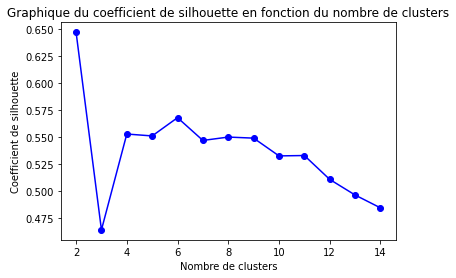

In [67]:
# Graphique du coefficient de silhouette en fonction du nombre de clusters
plt.plot(range_n_clusters, s_scores, 'bo-')
plt.title('Graphique du coefficient de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()
#our un cluster, le coefficient de silhouette est égal à la moyenne des coefficients des objets du cluster.
#le coefficient de silhouette permet de mesurer la qualité de l'apprentissage supervisé.
#Pour une observation ou une instance  ii  de la base de données, le coefficient de silhouette est donné par la formule suivante :

#si=bi−aimax(ai,bi)si=bi−aimax(ai,bi) 


In [ ]:
Le nombre de clusters qui satisfait le plus ces deux critères est 2, vu que le coefficient de silhouette de partitionnement pour n_cluters = 2 est le plus élevé.

# CLUSTERING USING KMEANS ANOTHER APPROACH

In [ ]:
#affectation des points au centre le plus proche(centroids).
#deplacecement du centre à la moyenne du cluster
#kmeans cherche la position des centres qui minimise la distance entre les points d'un cluster et la distance de ce dernier(centrois)

In [ ]:
#Segmentation using Age , Annual Income and Spending Score

In [6]:
df = pd.read_csv('Mall_Customers.csv')

In [7]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

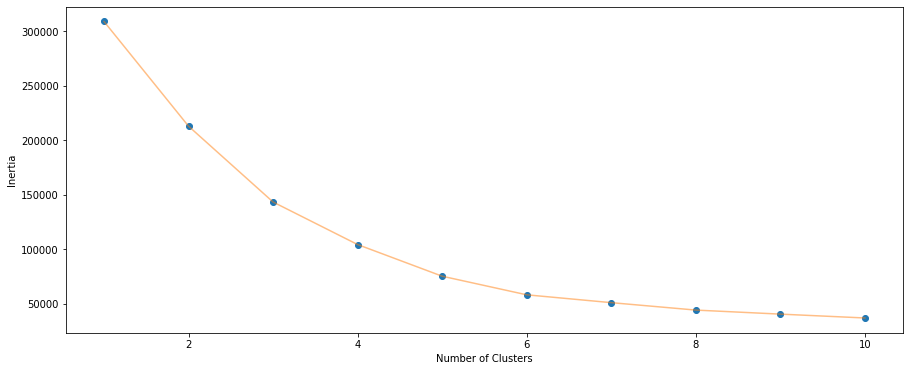

In [8]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
#Le nombre optimal de clusters est le point représentant le coude. Ici le coude peut être représenté par K=6
# k qui minimise la somme des carrés de la distance de chaque point à son centroïde à l'intérieur de chaque cluster 
#affectation des points au centre le plus proche(centroids).
#deplacecement du centre à la moyenne du cluster
#kmeans cherche la position des centres qui minimise la distance entre les points d'un cluster et la distance de ce dernier

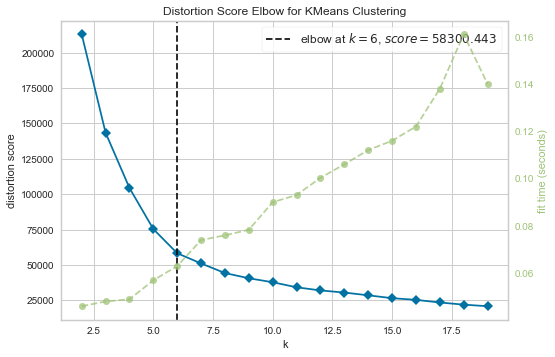

6

In [11]:
#CLUSTERING
#Lets find the optimum number of clusters
from yellowbrick.cluster import KElbowVisualizer
knn = KMeans()
elbow = KElbowVisualizer(knn, k=(2, 20))
elbow.fit(X3)
elbow.show()
elbow.elbow_value_ # 6

In [14]:
knn = KMeans(n_clusters=elbow.elbow_value_).fit(X3)
clusters = knn.labels_

X3 = df.groupby('Age').agg({
                             'Spending Score (1-100)': lambda y: y.nunique(),
                             'Annual Income (k$)': lambda z: z.sum()})

pd.DataFrame({"Age": X3.index, "Clusters": clusters})

X3["cluster_no"] = clusters
X3["cluster_no"] = X3["cluster_no"] + 1
X3.head()

,Spending Score (1-100),Annual Income (k$),cluster_no
Age,,,
18,4,205,1
19,8,456,5
20,5,208,1
21,4,194,1
22,3,94,4


In [15]:
# Describing clusters
X3.groupby("cluster_no").agg({"cluster_no": "count"})
X3.groupby("cluster_no").agg(np.mean)

,Spending Score (1-100),Annual Income (k$)
cluster_no,,
1,3.285714,188.357143
2,6.125000,383.750000
3,10.000000,959.000000
4,1.823529,96.000000
5,6.500000,480.500000
6,4.285714,270.285714


In [9]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [10]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(

     title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [20]:
# STANDARDIZATION
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0, 1))
X4= sc.fit_transform(X3)
X4[0:10]

array([[0.33333333, 0.19787234, 0.        ],
       [0.77777778, 0.46489362, 0.8       ],
       [0.44444444, 0.20106383, 0.        ],
       [0.33333333, 0.18617021, 0.        ],
       [0.22222222, 0.07978723, 0.6       ],
       [0.55555556, 0.24468085, 1.        ],
       [0.33333333, 0.14680851, 0.        ],
       [0.22222222, 0.16382979, 0.        ],
       [0.11111111, 0.10319149, 0.6       ],
       [0.55555556, 0.38297872, 0.2       ]])

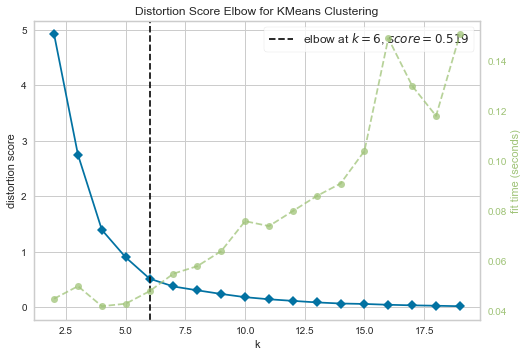

6

In [19]:
#CLUSTERING
#Lets find the optimum number of clusters
from yellowbrick.cluster import KElbowVisualizer
knn = KMeans()
elbow = KElbowVisualizer(knn, k=(2, 20))
elbow.fit(X4)
elbow.show()
elbow.elbow_value_ # 6

In [24]:
knn = KMeans(n_clusters=elbow.elbow_value_).fit(X4)
clusters = knn.labels_

X4 = df.groupby('Age').agg({ #'InvoiceDate': lambda x: (today_date-x.max()).days,
                             'Spending Score (1-100)': lambda y: y.nunique(),
                             'Annual Income (k$)': lambda z: z.sum()})

pd.DataFrame({"Age": X4.index, "Clusters": clusters})

X4["cluster_no"] = clusters
X4["cluster_no"] = X4["cluster_no"] + 1
X4.head()

,Spending Score (1-100),Annual Income (k$),cluster_no
Age,,,
18,4,205,6
19,8,456,5
20,5,208,6
21,4,194,6
22,3,94,1
